In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'D:\Projects\boston Housing\HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
# Missing data
missing_data = df.isnull().sum()

percentage_missing_data = (missing_data.sum()/df.shape[0])*100
percentage_missing_data

23.715415019762844

In [8]:
total_value = df.isnull().sum().sort_values(ascending=False)

total_percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing_values = pd.concat([total_value, total_percentage], axis=1, keys=["TOTAL", 'PERCENTAGE'])

missing_values

,TOTAL,PERCENTAGE
LSTAT,20,3.952569
AGE,20,3.952569
CHAS,20,3.952569
INDUS,20,3.952569
ZN,20,3.952569
CRIM,20,3.952569
MEDV,0,0.000000
B,0,0.000000
PTRATIO,0,0.000000
TAX,0,0.000000


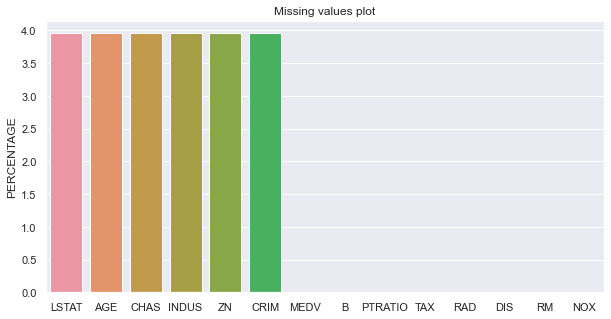

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x=missing_values.index, y=missing_values['PERCENTAGE'], data=missing_values)
plt.title("Missing values plot")
plt.show()

In [10]:
#filling the missing values
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)

In [11]:
df['CHAS'].fillna(df['CHAS'].median(),inplace=True)

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
#Checking for duplicate values
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [14]:
#definig outlier function
def outlier(feature):
    sorted(feature)
    q1,q3 =np.percentile(feature,[25,75])
    IQR=q3-q1
    lower_range = q1-(1.5*IQR)
    upper_range = q3+(1.5*IQR)
    return lower_range, upper_range


print('lb1, up1 =',outlier(df.CRIM), 'CRIM')
print('lb2, up2 =',outlier(df.ZN), 'ZN')
print('lb3, up3= ',outlier(df.INDUS),'INUDS')
print('lb4, up4 = ', outlier(df.CHAS), 'CHAS')
print('lb5, ub5 =', outlier(df.NOX),'NOX')
print('lb6, ub6 = ', outlier(df.RM),'RM')
print('lb7, ub7= ', outlier(df.AGE),'AGE')
print('lb8 ub8 = ', outlier(df.DIS),'DIS')
print('lb9, ub9= ',outlier(df.RAD),'RAD')
print('lb10, ub10=', outlier(df.TAX),'TAX')
print('lb11, ub11=', outlier(df.PTRATIO),'PTRATIO')
print('lb12, ub12=', outlier(df.B),'B')
print('lb13, ub13 = ',outlier(df.LSTAT),'LSTAT')


lb1, up1 = (-5.2097234567901225, 8.90483242798354) CRIM
lb2, up2 = (-16.8179012345679, 28.0298353909465) ZN
lb3, up3=  (-14.175, 37.465) INUDS
lb4, up4 =  (0.0, 0.0) CHAS
lb5, ub5 = (0.18650000000000005, 0.8865) NOX
lb6, ub6 =  (4.778500000000001, 7.730499999999999) RM
lb7, ub7=  (-25.549999999999997, 165.04999999999998) AGE
lb8 ub8 =  (-2.5322000000000005, 9.820800000000002) DIS
lb9, ub9=  (-26.0, 54.0) RAD
lb10, ub10= (-301.5, 1246.5) TAX
lb11, ub11= (13.199999999999998, 24.4) PTRATIO
lb12, ub12= (344.10624999999993, 427.49625000000003) B
lb13, ub13 =  (-6.779999999999999, 30.58) LSTAT


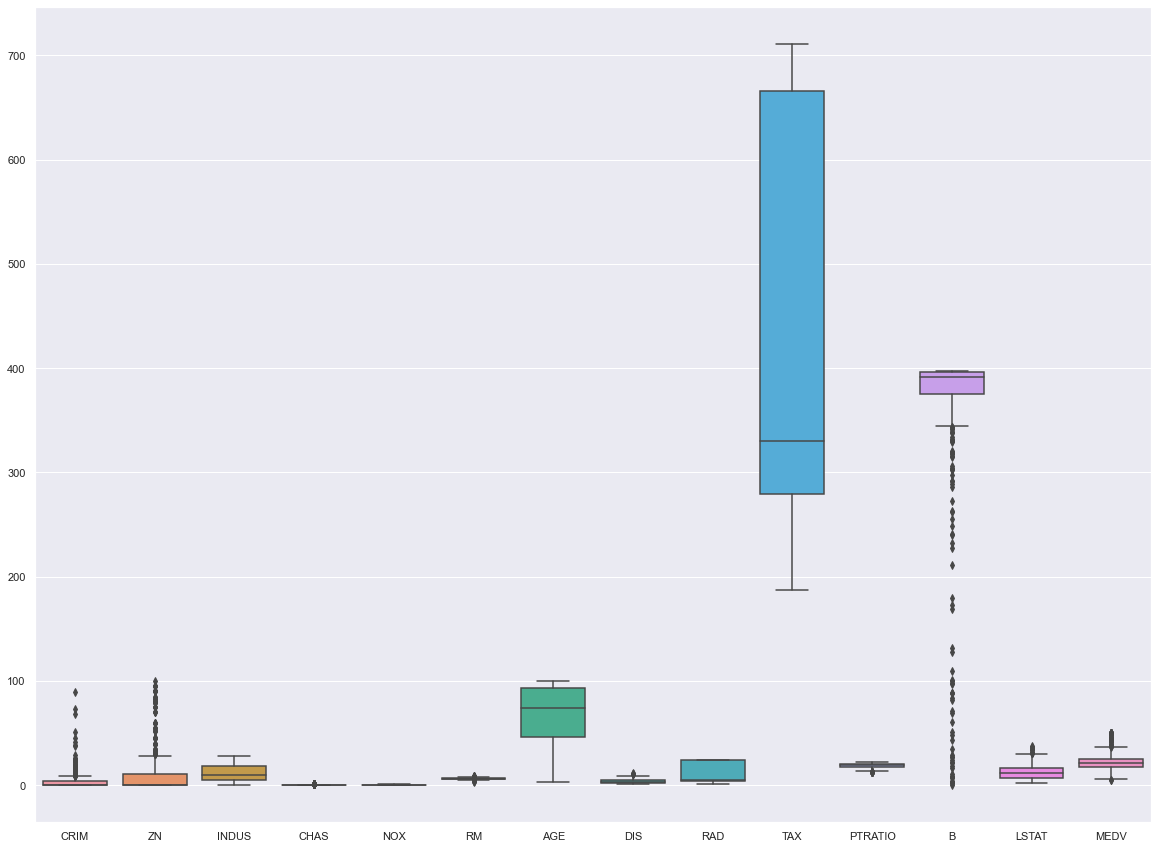

In [16]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


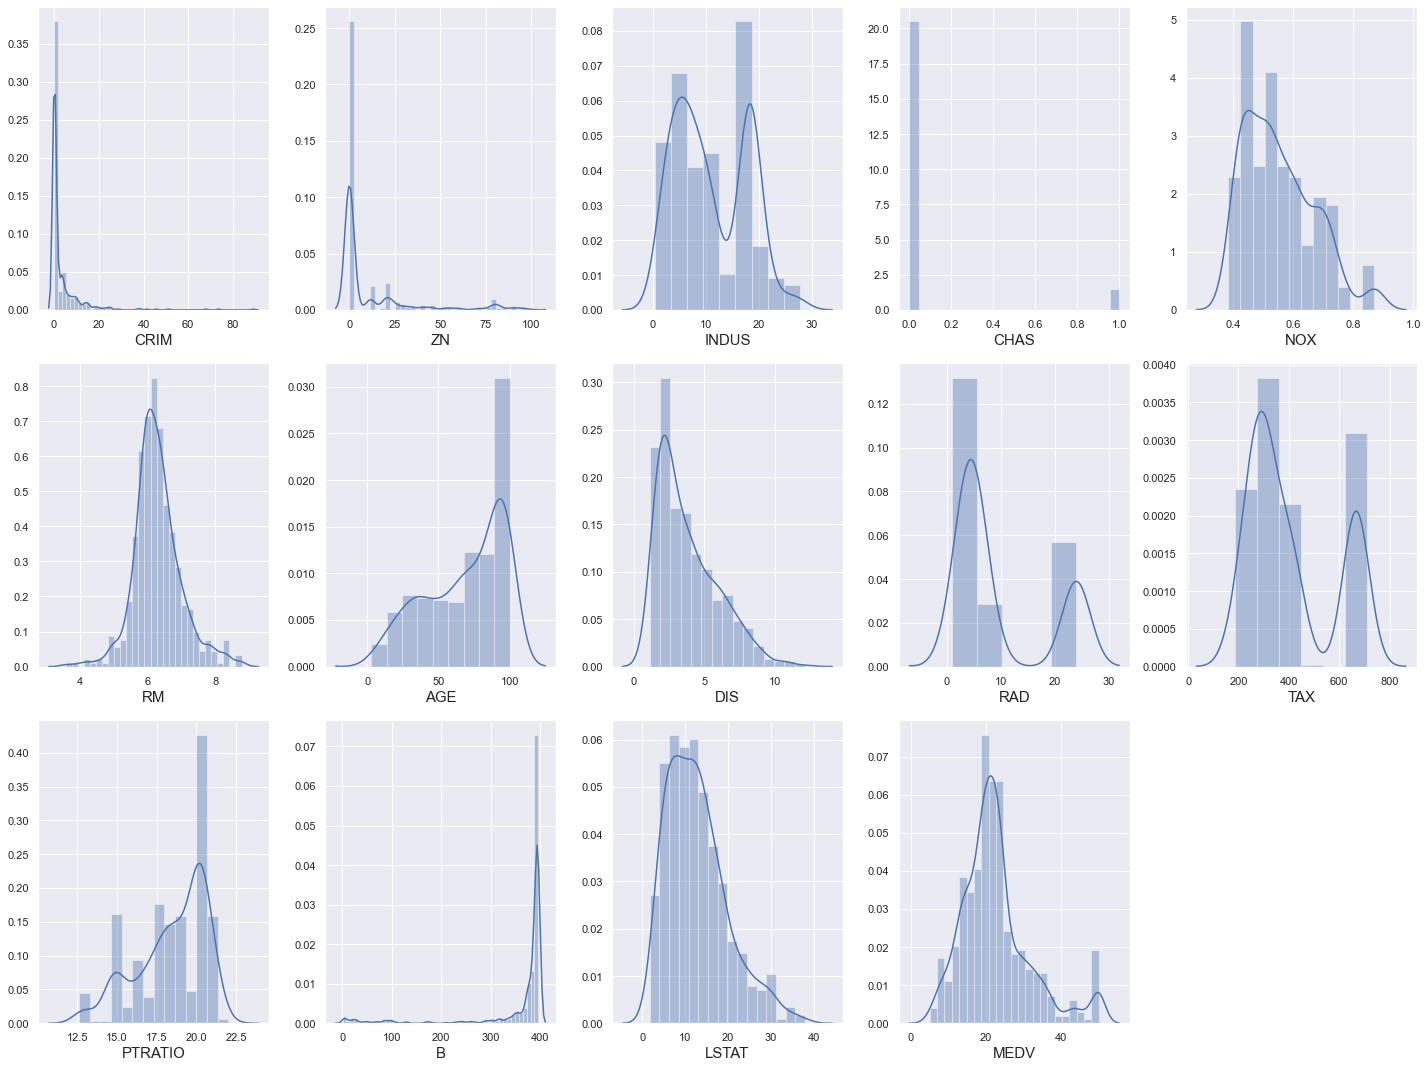

In [19]:
#visualize the data

plt.figure(figsize=(20,15))

plotnumber=1

for feature in df:
    if plotnumber <= 14:
        ax = plt.subplot(3,5, plotnumber)
        sns.distplot(df[feature])
        plt.xlabel(feature, fontsize=15)
    
    plotnumber+=1
    
plt.tight_layout()
plt.show()
    

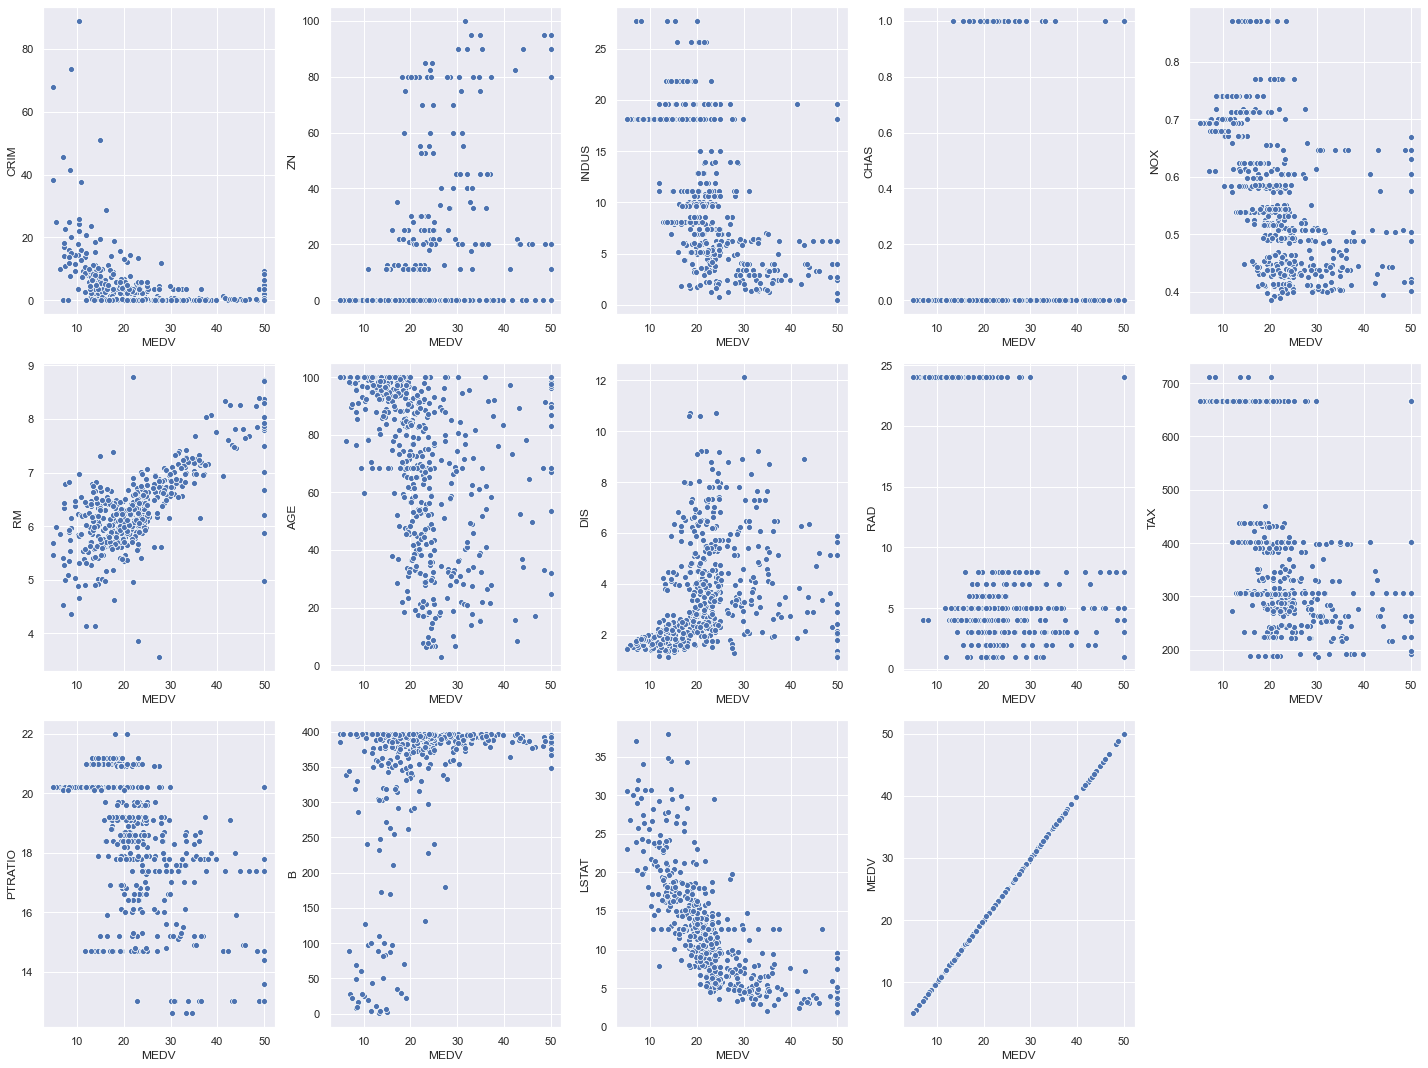

In [20]:
#scatter plot for data distribution against pricce

plt.figure(figsize=(20,15))

plotnumber = 1

for feature in df:
    if plotnumber <=14:
        ax= plt.subplot(3,5, plotnumber)
        sns.scatterplot(y=df[feature],x=df['MEDV'] )
       
    plotnumber +=1
    
plt.tight_layout()
plt.show()



In [22]:
inputs = df.drop(['MEDV'], axis=1)

target = df['MEDV']

In [23]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [24]:
inputs_scaled = Scaler.fit_transform(inputs)

In [25]:
inputs_scaled

array([[-0.42232846,  0.29644292, -1.31101039, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.41986984, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.41987219, -0.48963852, -0.5997709 , ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  1.17646583,
         0.44105193, -0.69020355]])

#### Here TAX and RAD have highest multicollinearity so lets see which feature to drop

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = inputs.columns
vif['VIF'] = [variance_inflation_factor(inputs_scaled, i) for i in range(inputs_scaled.shape[1])]
  
vif    
    




,Features,VIF
0,CRIM,1.722630
1,ZN,2.176502
2,INDUS,3.627486
3,CHAS,1.065927
4,NOX,4.222571
5,RM,1.859267
6,AGE,2.742374
7,DIS,3.776199
8,RAD,7.373558
9,TAX,8.879956


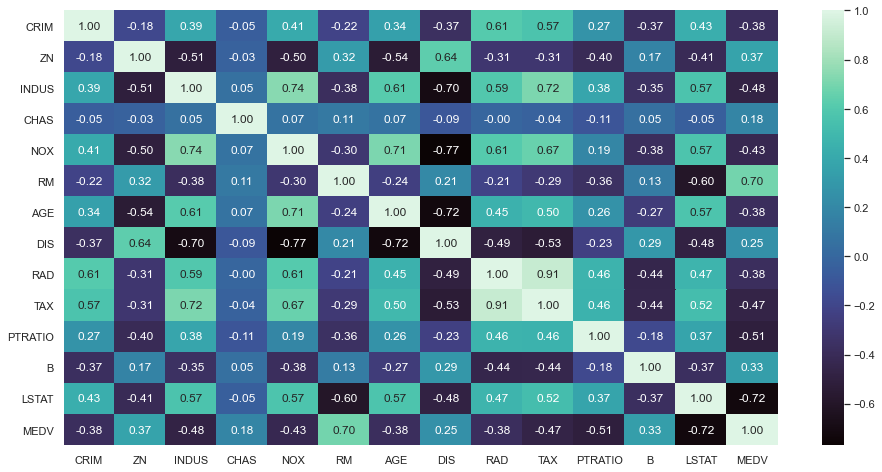

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, fmt='1.2f', cmap='mako')

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(inputs, target)


ExtraTreesRegressor()

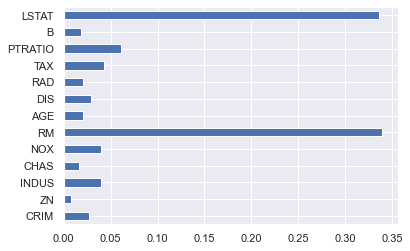

In [45]:
feature_importance = pd.Series(ETR.feature_importances_, index=inputs.columns)
feature_importance.plot(kind='barh')
plt.show()

### Here we can see that Taxis more important then RAD so we will drop RAD

In [46]:
df.drop(['RAD'], axis=1, inplace=True)

In [47]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,12.715432,36.2


### Splitting the data into train and test

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.3, random_state=0)

In [49]:
# Create the model linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [50]:
#predict 
y_pred = reg.predict(x_test)

In [54]:
Test_Accuracy_Score= reg.score(x_test,y_test)
Test_Accuracy_Score

0.6543250336826508

In [55]:
#Calculate adjusted R2

def adjr2(x,y,model):
    r2 = model.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [58]:
adjusted_r2_lr_train = adjr2(x_train, y_train, reg)
adjusted_r2_lr_train

0.7493185760269061

In [59]:
adjusted_r2_lr_test = adjr2(x_test, y_test,reg)
adjusted_r2_lr_test

0.6217614498991324

In [60]:
# Create model random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg_rfr =  RandomForestRegressor()
reg_rfr.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
y_pred_rfr = reg_rfr.predict(x_test)

In [62]:
Accuracy_score= reg_rfr.score(x_test, y_test)
Accuracy_score

0.8256405055760025

In [63]:
adjusted_r2_rfr_test = adjr2(x_test, y_test, reg_rfr)
adjusted_r2_rfr_test

0.8092153358114231

In [68]:
summary_table = pd.DataFrame()
summary_table['Model'] = ['Linear Regression', 'Random Forest Regressor']
summary_table['Accuracy Score'] = [Test_Accuracy_Score, Accuracy_score]
summary_table['Adjusted R2'] = [adjusted_r2_lr_test, adjusted_r2_rfr_test]

summary_table

,Model,Accuracy Score,Adjusted R2
0,Linear Regression,0.654325,0.621761
1,Random Forest Regressor,0.825641,0.809215
